# Network visualization


## 1 - Dendrogram

Use scipy dendrogram

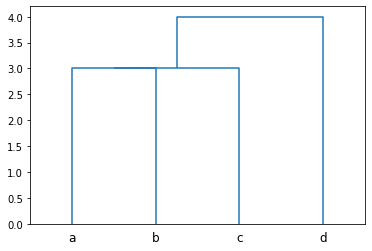

In [1]:
# Load required modules
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Construct the graph/hierarchy
d           = { 0: [1, 'd'], 1: ['a', 'b', 'c'], 'a': [], 'b': [], 'c': [], 'd': []}
G           = nx.DiGraph(d)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
for u in inner_nodes:
    children = set()
    node_list = list(d[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += d[v]

    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = d[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(subtree[x] + subtree[y])
        i, j = index[tuple(subtree[x])], index[tuple(subtree[y])]
        Z.append([i, j, float(len(subtree[n])), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# Visualize
dendrogram(Z, labels=leaves)
plt.show()